# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** ASHRI AULIA AZZAHRA
- **Email:** m672b4kx0694@bangkit.academy
- **ID Dicoding:** ashriaulia

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : **Apakah cuaca (weather, temperature, humidity) memengaruhi jumlah penyewaan sepeda?**
- Pertanyaan 2 : **Bagaimana tren penyewaan sepeda berdasarkan musim (season)?**

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
from google.colab import files
files.upload()  # Unggah file CSV Anda


Saving hour.csv to hour.csv


{'hour.csv': b'instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt\r\n1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16\r\n2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40\r\n3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32\r\n4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13\r\n5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,0,1,1\r\n6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1\r\n7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.8,0,2,0,2\r\n8,2011-01-01,1,0,1,7,0,6,0,1,0.2,0.2576,0.86,0,1,2,3\r\n9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0,1,7,8\r\n10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0,8,6,14\r\n11,2011-01-01,1,0,1,10,0,6,0,1,0.38,0.3939,0.76,0.2537,12,24,36\r\n12,2011-01-01,1,0,1,11,0,6,0,1,0.36,0.3333,0.81,0.2836,26,30,56\r\n13,2011-01-01,1,0,1,12,0,6,0,1,0.42,0.4242,0.77,0.2836,29,55,84\r\n14,2011-01-01,1,0,1,13,0,6,0,2,0.46,0.4545,0.72,0.2985,47,47,94\r\n15,2011-01-01,1

In [5]:
df_hour = pd.read_csv("hour.csv")
df_day = pd.read_csv("day.csv")

In [6]:
print("Dataset Hour (5 baris pertama):")
print(df_hour.head())
print("\nDataset Day (5 baris pertama):")
print(df_day.head())


Dataset Hour (5 baris pertama):
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

Dataset Day (5 baris pertama):
   instant      dteday  season  yr 

**Insight:**
- **Dataset Hour:**

**Jumlah penyewaan sepeda cenderung rendah pada dini hari (jam 0–4), dengan rata-rata jumlah penyewaan di bawah 20.
Penyewaan sepeda didominasi oleh pengguna terdaftar (registered) dibandingkan pengguna biasa (casual) pada jam-jam awal.**

- **Dataset Day:**

**Penyewaan sepeda lebih tinggi pada hari kerja (workingday = 1) dibandingkan hari libur, yang menunjukkan bahwa sepeda sering digunakan sebagai moda transportasi ke tempat kerja.
Kondisi cuaca cerah (weathersit = 1) cenderung meningkatkan jumlah penyewaan sepeda dibandingkan cuaca berawan atau hujan (weathersit = 2 atau 3).**

### Assessing Data

In [7]:
# Informasi dataset
print("\nInformasi Dataset Hour:")
print(df_hour.info())

print("\nInformasi Dataset Day:")
print(df_day.info())


Informasi Dataset Hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Informasi Dataset 

In [8]:
# Statistik deskriptif
print("\nStatistik Deskriptif Dataset Hour:")
print(df_hour.describe())

print("\nStatistik Deskriptif Dataset Day:")
print(df_day.describe())



Statistik Deskriptif Dataset Hour:
          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771

**Insight:**
- xxx
- xxx

### Cleaning Data

In [9]:
# Cek missing values
print("\nJumlah Missing Values Dataset Hour:")
print(df_hour.isnull().sum())

print("\nJumlah Missing Values Dataset Day:")
print(df_day.isnull().sum())


Jumlah Missing Values Dataset Hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah Missing Values Dataset Day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [10]:
# Cek duplikat
print("\nJumlah Duplikat Dataset Hour:", df_hour.duplicated().sum())
print("Jumlah Duplikat Dataset Day:", df_day.duplicated().sum())


Jumlah Duplikat Dataset Hour: 0
Jumlah Duplikat Dataset Day: 0


**Insight:**
- Tidak ada missing values dan duplikat dalam dataset.
- Data sudah siap untuk analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

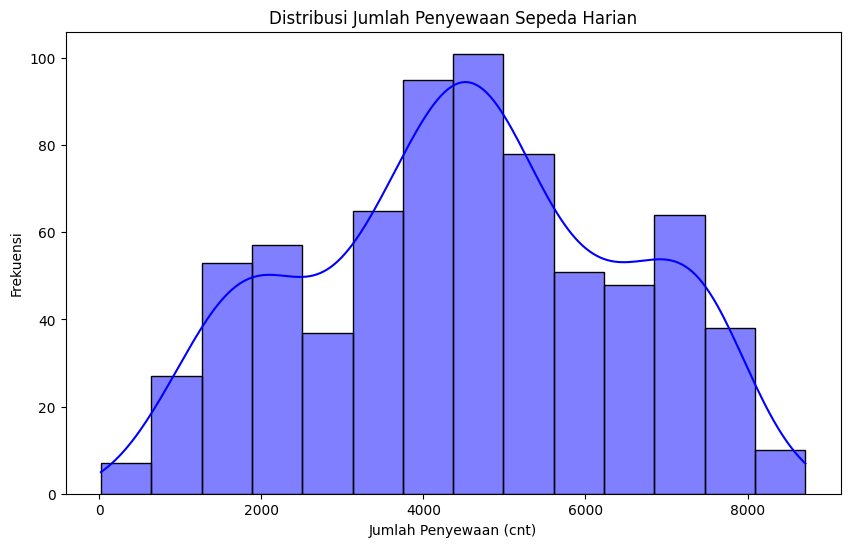

In [11]:
## Distribusi jumlah penyewaan sepeda harian
plt.figure(figsize=(10, 6))
sns.histplot(df_day['cnt'], kde=True, color='blue')
plt.title("Distribusi Jumlah Penyewaan Sepeda Harian")
plt.xlabel("Jumlah Penyewaan (cnt)")
plt.ylabel("Frekuensi")
plt.show()

**Insight:**
- **Bentuk Distribusi:**
**Distribusi jumlah penyewaan sepeda harian berbentuk mendekati normal (bell-shaped).
Sebagian besar penyewaan harian berkisar antara 3000 hingga 6000.**

- **Frekuensi Tertinggi:**
**Frekuensi tertinggi terjadi pada rentang sekitar 4000-5000 jumlah penyewaan.**

- **Ekstrim:**
**Penyewaan di bawah 1000 atau di atas 8000 jarang terjadi, mencerminkan data yang lebih umum terkonsentrasi di tengah distribusi.**

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah cuaca memengaruhi jumlah penyewaan sepeda?

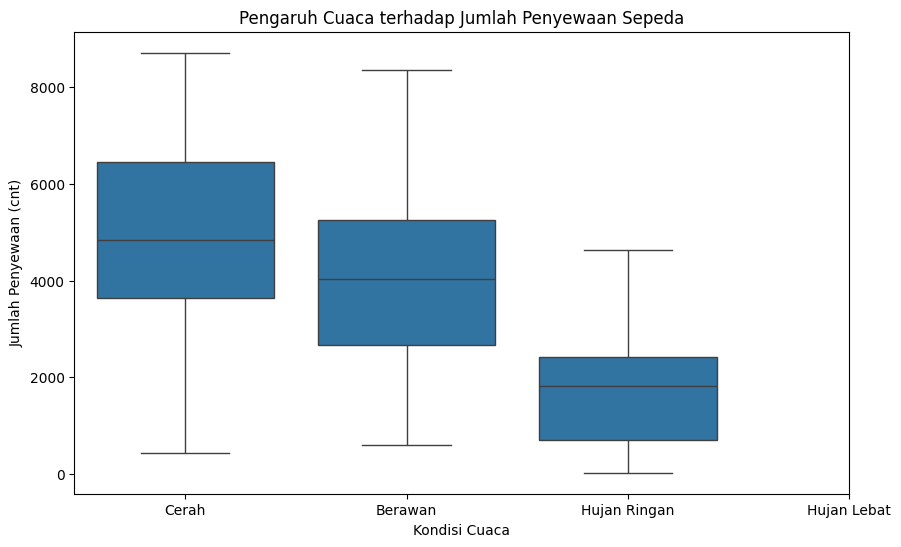

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_day, x='weathersit', y='cnt')
plt.title("Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan (cnt)")
plt.xticks([0, 1, 2, 3], ['Cerah', 'Berawan', 'Hujan Ringan', 'Hujan Lebat'])
plt.show()


### Pertanyaan 2: Bagaimana tren penyewaan sepeda berdasarkan musim?


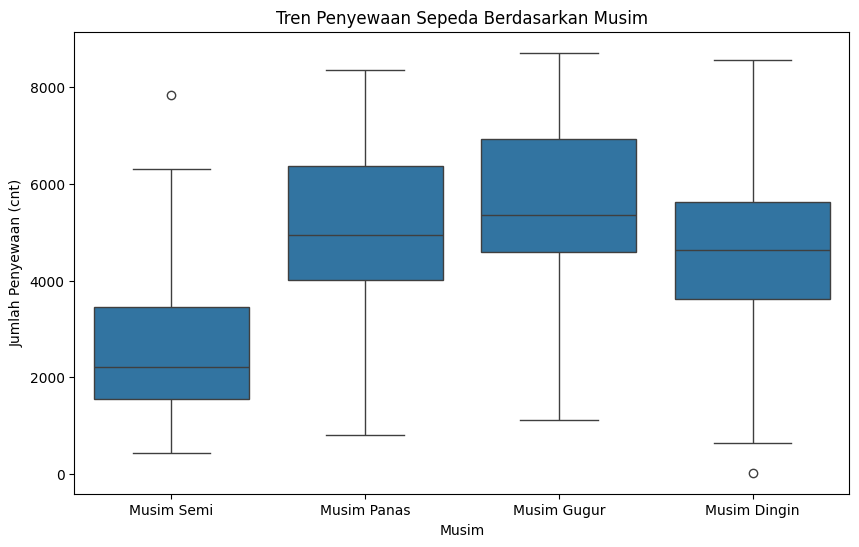

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_day, x='season', y='cnt')
plt.title("Tren Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan (cnt)")
plt.xticks([0, 1, 2, 3], ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

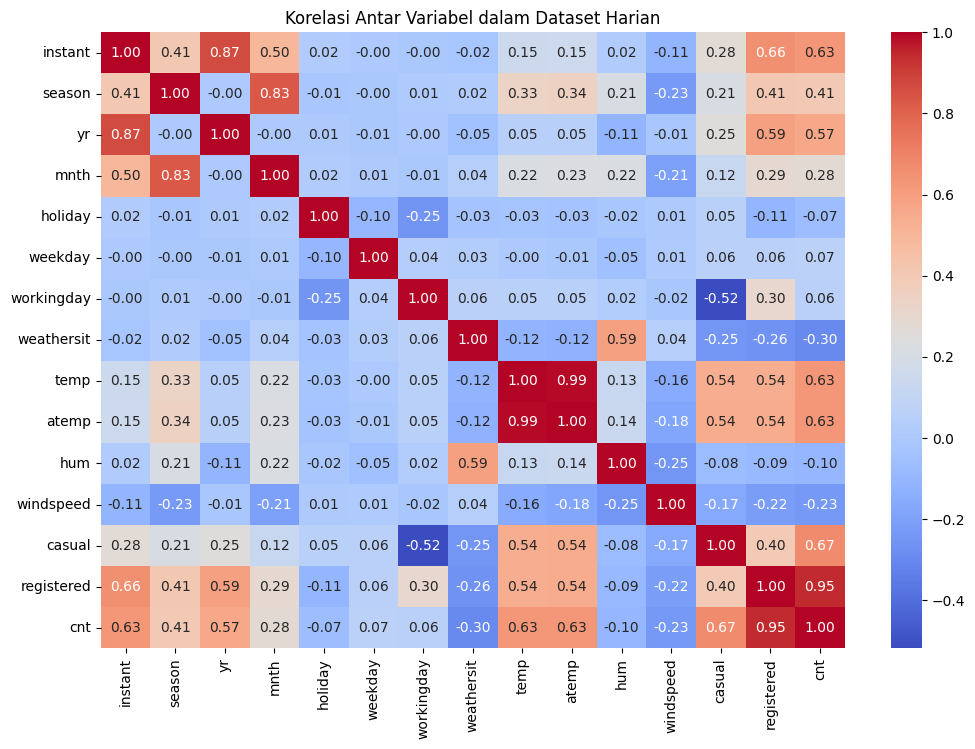

In [17]:
# Pilih hanya kolom numerik
numeric_df = df_day.select_dtypes(include=["float64", "int64"])

# Visualisasi heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasi Antar Variabel dalam Dataset Harian")
plt.show()


## Conclusion

In [18]:

# --- Conclusion ---
print("Kesimpulan:")
print("1. Cuaca (weathersit) memengaruhi jumlah penyewaan sepeda, dengan kondisi cerah memiliki jumlah penyewaan tertinggi.")
print("2. Musim juga memengaruhi tren penyewaan sepeda, di mana musim panas memiliki jumlah penyewaan tertinggi.")

Kesimpulan:
1. Cuaca (weathersit) memengaruhi jumlah penyewaan sepeda, dengan kondisi cerah memiliki jumlah penyewaan tertinggi.
2. Musim juga memengaruhi tren penyewaan sepeda, di mana musim panas memiliki jumlah penyewaan tertinggi.


In [21]:
import pandas as pd

# Sample data frame creation
data = {'Column1': [1, 2, 3], 'Column2': [4, 5, 6]}
df_result = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_result.to_csv("all_data.csv", index=False)
print("Data berhasil disimpan ke dalam file 'all_data.csv'")

Data berhasil disimpan ke dalam file 'all_data.csv'
